In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/balanced_milk.csv')

In [3]:
# Normalize the features
scaler = StandardScaler()
X = data.drop('Grade', axis=1)
X_scaled = scaler.fit_transform(X)

# Split the data into features and target
X = pd.DataFrame(X_scaled, columns=X.columns)
y = data['Grade']

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Create a logistic regression model
model = LogisticRegression()

In [6]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

<Figure size 800x600 with 0 Axes>

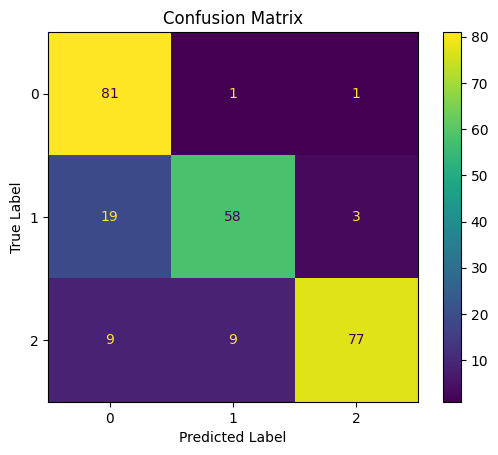

Accuracy: 0.84
Precision: 0.85
Recall: 0.84
F1-score: 0.84


In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=data['Grade'].unique())

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data['Grade'].unique())
disp.plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')